In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

BASE_DIR = Path(os.getcwd()).parent
os.chdir(BASE_DIR / "App")

from utils.utils import get_color_map, NAME_MAPPING

In [2]:
def compare_colormap(raw_data, selected_param, selected_time, cmap="bwr", min_clip=None, max_clip=None):
    df = raw_data[raw_data["year_month"] == selected_time].sort_values(selected_param, ascending=False).copy()

    methods = ["color_clip", "color_log", "color_clip_log", "color"]

    rgba_colors, colorbar_html = get_color_map(
        df[selected_param],
        NAME_MAPPING[selected_param],
        cmap=cmap,
        min_clip=min_clip,
        max_clip=max_clip,
        log_scale_mapping=False,
    )
    df["color_clip"] = rgba_colors.tolist()

    rgba_colors, colorbar_html = get_color_map(
        df[selected_param],
        NAME_MAPPING[selected_param],
        cmap=cmap,
        min_clip=None,
        max_clip=None,
        log_scale_mapping=True,
    )
    df["color_log"] = rgba_colors.tolist()

    rgba_colors, colorbar_html = get_color_map(
        df[selected_param],
        NAME_MAPPING[selected_param],
        cmap=cmap,
        min_clip=min_clip,
        max_clip=max_clip,
        log_scale_mapping=True,
    )
    df["color_clip_log"] = rgba_colors.tolist()

    rgba_colors, colorbar_html = get_color_map(
        df[selected_param],
        NAME_MAPPING[selected_param],
        cmap=cmap,
        min_clip=None,
        max_clip=None,
        log_scale_mapping=False,
    )
    df["color"] = rgba_colors.tolist()

    for col in methods:
        df[col] = df[col].apply(lambda rgba: tuple(v / 255 for v in rgba))

    plot_df = df[[selected_param] + methods].drop_duplicates()
    turb_vals = np.sort(plot_df[selected_param].unique())

    df_idx = plot_df.set_index(selected_param)

    n_methods = len(methods)
    y_pos = np.arange(n_methods)

    plt.figure(figsize=(10, 2.5))

    for i, method in enumerate(methods):
        cols = [df_idx.loc[val, method] for val in turb_vals]
        plt.scatter(turb_vals, [i] * len(turb_vals), color=cols, s=100, marker="s", edgecolor="none")

    plt.yticks(y_pos, methods)
    plt.xlabel(selected_param)
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    plt.tight_layout()
    plt.show()

In [3]:
selected_param = "Turbidity"
selected_time = "2018-01"

In [4]:
water_quality = pd.read_csv(BASE_DIR / "data/water_quality.csv")
water_quality = water_quality.groupby(
    ["year_month", "year", "month", "longitude", "latitude", "Neighbourhood"], as_index=False
)[["Residual_Chlorine", "Turbidity"]].mean()

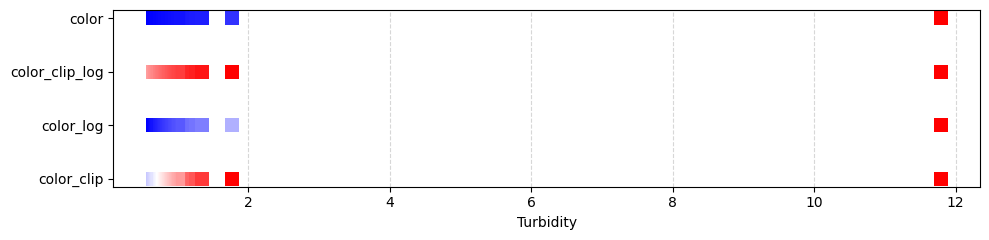

In [5]:
compare_colormap(water_quality, selected_param=selected_param, selected_time=selected_time, min_clip=0.1, max_clip=1.5)